In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.nunique()
#valeur ili nesete3emlohe fi kol colone

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [ ]:
df.dtypes
#nchofo type mte3 kol colon

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**data analysis**

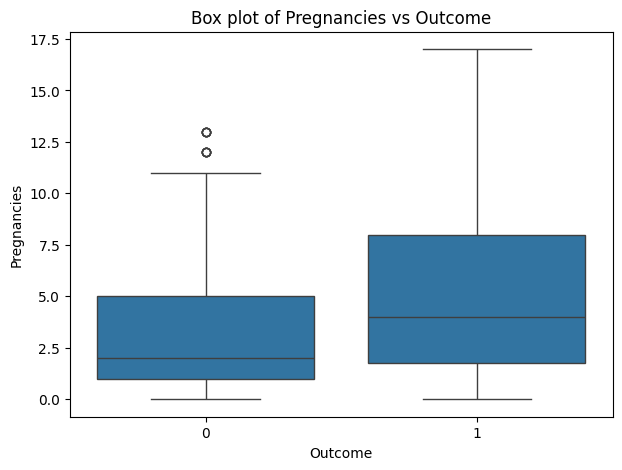

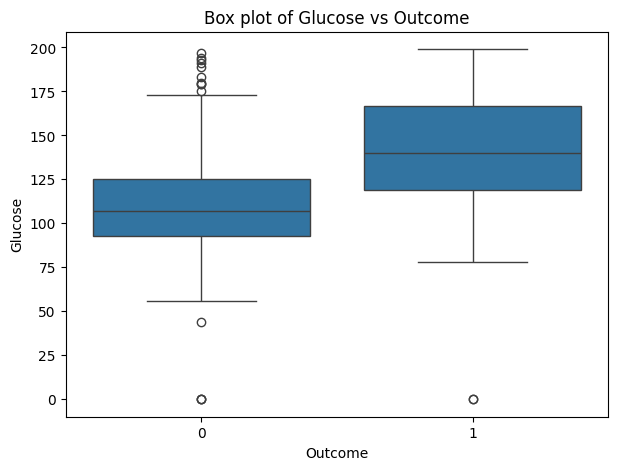

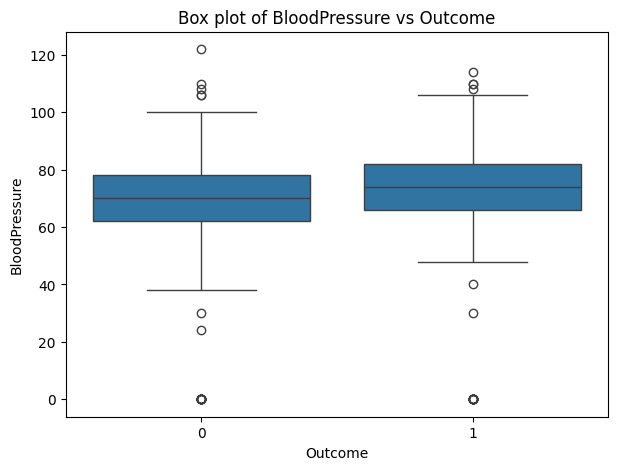

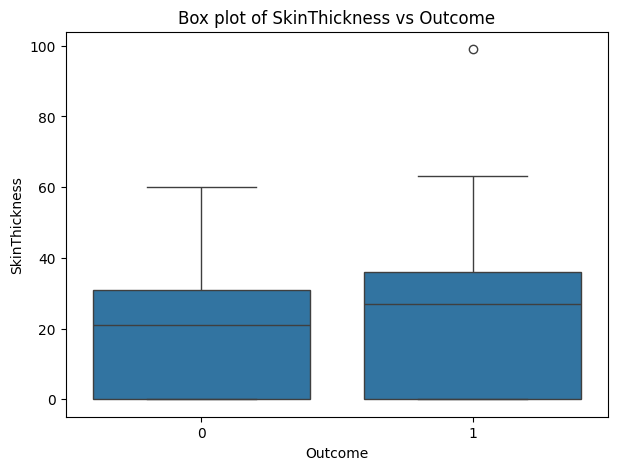

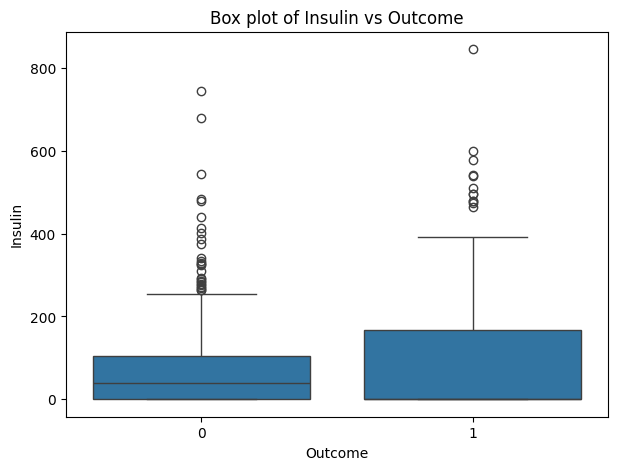

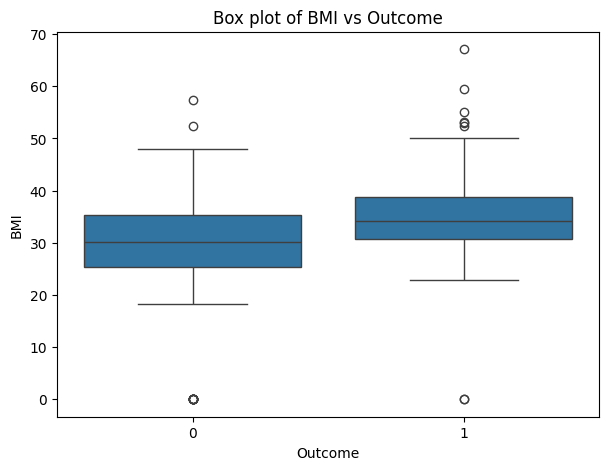

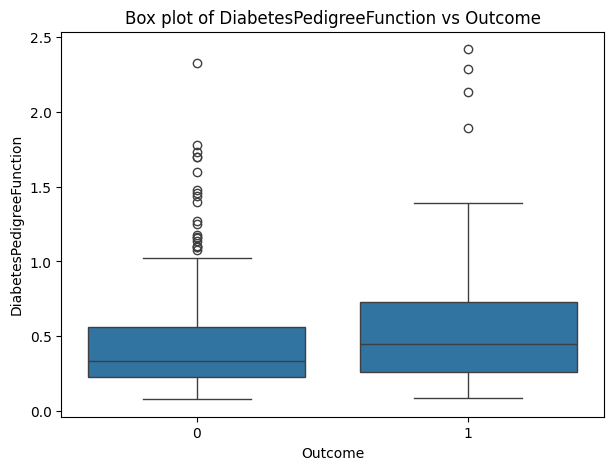

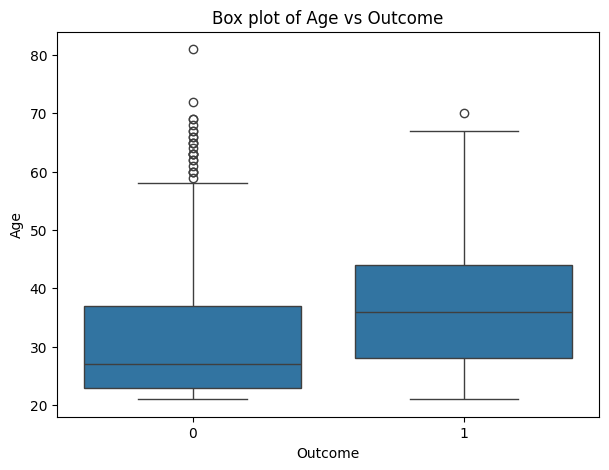

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns[:-1]:
  plt.figure(figsize=(7,5))
  sns.boxplot(x='Outcome', y=col, data=df)
  plt.title(f'Box plot of {col} vs Outcome')

**Train test split**

In [ ]:
X= df.drop('Outcome', axis=1).values
y= df['Outcome'].values
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

**Model training**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)

**search best model params**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    'n_neighbors':[1,2,3,4,5,6,7,8,9],
}
knn = KNeighborsClassifier()

grid_search= GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters", grid_search.best_params_)
print("Best Score", grid_search.best_score_)

Best Parameters {'n_neighbors': 9}
Best Score 0.7521739130434784


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
print("------------------------------------")

y_pred= knn.predict([[1,89,66,29,0,26.6,0.351,31]])
print("First person is: ", y_pred)

y_pred2=knn.predict([[2,197,70,45,543,30.5,0.158,53]])
print("Second person is: ", y_pred2)

print("------------------------------------")


------------------------------------
First person is:  [0]
Second person is:  [1]
------------------------------------


**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred= knn.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7142857142857143


In [ ]:
print("classification rapport: ")
print(classification_report(y_test, y_pred))

classification rapport: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       201
           1       0.60      0.52      0.56       107

    accuracy                           0.71       308
   macro avg       0.68      0.67      0.67       308
weighted avg       0.71      0.71      0.71       308



**confusion matrix**

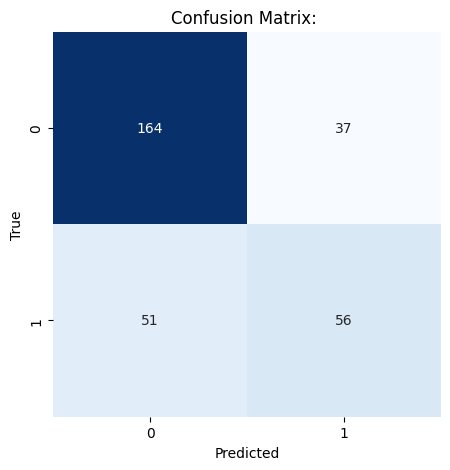

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix: ")
plt.show()